# Análisis exploratorio de datos

### Importar librerías

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import gzip
import json
import string
import re


import nltk # imports the natural language toolkit
import plotly
import collections
from collections import Counter
from nltk.util import ngrams

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')


from nltk.corpus import stopwords

from scipy.stats import chi2_contingency
import pingouin
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\drraarguello\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\drraarguello\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\drraarguello\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Importar conjuntos de datos

In [ ]:
data_desc = pd.read_csv(r'data/DescripcionNew.csv', encoding = 'utf-8')
data_desc = data_desc[data_desc.Linea_Negocio.isin(['Geoaseo','Geolumina','Geoambiental'])]
data_desc.head()

tik_codigo                                        descripcion  \
2     TIK1006  Se debe realizar la configuración de los servi...   
3     TIK1015                Análisis Calidad y verificaciones.    
5     TIK1007                         Crear servicios Geoserver    
8     TIK1008                         Crear servicios Geoserver    
12    TIK1020                     publicación servicio Geoserver   

     propietario                        categoria  modulo  producto ans  \
2   1.607954e+07           1- Nuevo requerimiento     NaN       NaN  NR   
3   1.058818e+09           1- Nuevo requerimiento     NaN       NaN  NR   
5   2.434355e+07  Publicación de servicios, capas     NaN       NaN  SS   
8   2.434355e+07  Publicación de servicios, capas     NaN       NaN  SS   
12  2.434355e+07           1- Nuevo requerimiento     NaN       NaN  NR   

                  nombre_cliente Linea_Negocio  
2   Cartagueña de Aseo Total ESP       Geoaseo  
3                        Codensa     Geolumina  
5                       Llanogas     Geolumina  
8                       Llanogas     Geolumina  
12                      Llanogas     Geolumina

### Solicitudes por línea de negocio

Text(0.4, 1.08, 'Tickets')

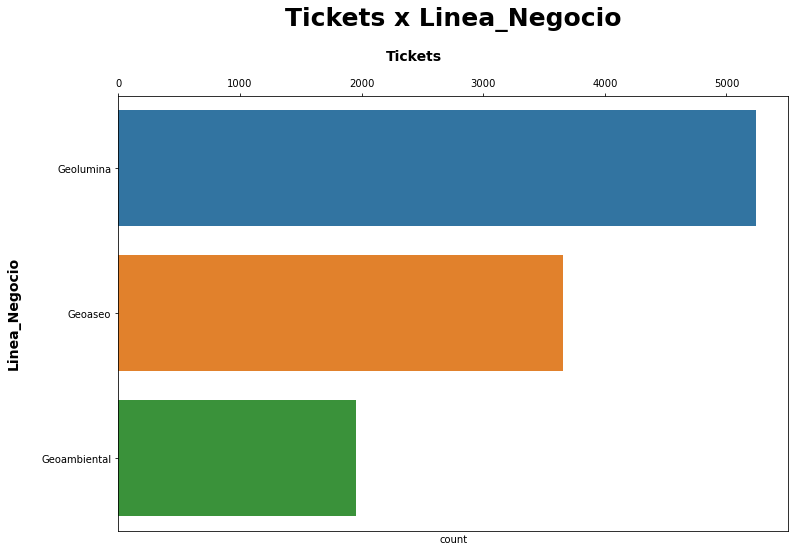

In [ ]:
max_min= data_desc['Linea_Negocio'].value_counts().index

#Datos grafica:

fig, ax = plt.subplots(figsize = (12,8))
sns.countplot(y = 'Linea_Negocio', data = data_desc, order= max_min)                  # Crear gráfico de conteo
plt.title('Tickets x Linea_Negocio', size = 25, weight=600, pad = 70)                 # Incluir título al gráfico
plt.ylabel('Linea_Negocio', size = 14, weight=600, labelpad=20)                       # Título para los ejes
ax.xaxis.set_ticks_position('top')                                                    # Ajustar ejes
ax.text(0.40, 1.08, 'Tickets', transform=ax.transAxes, size=14, weight=600)           # Ajustar nombres

### Solicitudes por categoría

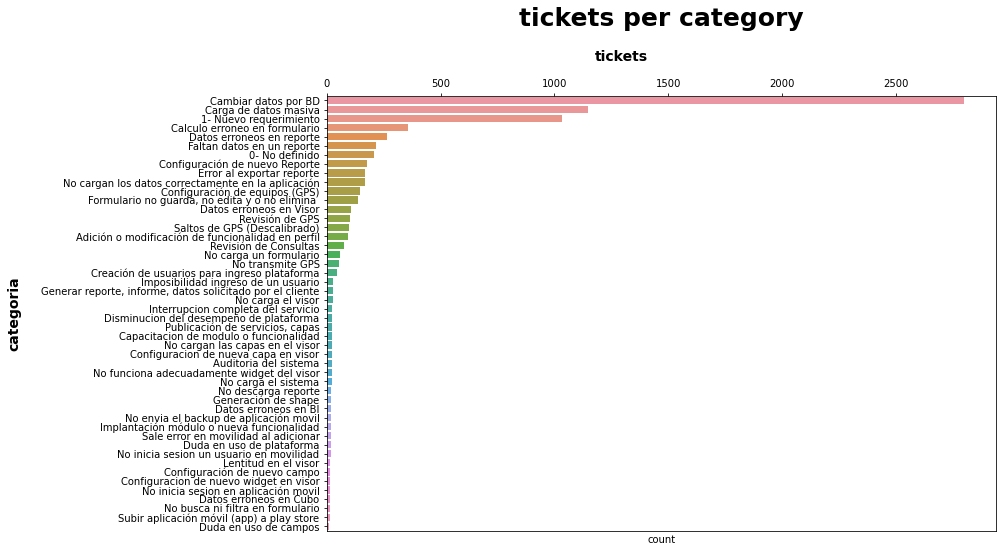

In [ ]:
max_min= data_desc['categoria'].value_counts().index

# Datos grafica:
fig, ax = plt.subplots(figsize = (12,8))                                          # Crear imágen
sns.countplot(y = 'categoria', data = data_desc, order= max_min)                  # Crear gráfico de conteo
plt.title('tickets per category', size = 25, weight=600, pad = 70)                # Incluir título a los ejes
plt.ylabel('categoria', size = 14, weight=600, labelpad=20)                       # Título de los ejes
ax.xaxis.set_ticks_position('top')                                                # Ajustar ejes
ax.text(0.40, 1.08, 'tickets', transform=ax.transAxes, size=14, weight=600) 
plt.show()

In [ ]:
# Revisión de categorías

data_desc[data_desc.categoria=="Configuración de nuevo campo"].head()

tik_codigo                                        descripcion  \
1520    TIK1427  solicito su colaboracion para crear el proceso...   
4878    TIK1194  Se requiere de su amable colaboración para cre...   
4990    TIK2094  Solicito amablemente concatenar el numero inte...   
6619    TIK2007  Por favor incluir nuevo campo en la integració...   
8638    TIK5535  Formulario: Resoluciones externos\nAmpliar la ...   

       propietario                     categoria  modulo  producto ans  \
1520  1.053831e+09  Configuración de nuevo campo     NaN       NaN  NR   
4878  1.032459e+09  Configuración de nuevo campo     NaN       NaN  NR   
4990  1.053831e+09  Configuración de nuevo campo     NaN       NaN  NR   
6619  3.040517e+07  Configuración de nuevo campo     NaN       NaN  NR   
8638  1.049610e+09  Configuración de nuevo campo     NaN       NaN  NR   

                   nombre_cliente Linea_Negocio  
1520  Veolia (antiguo Grupo Sala)       Geoaseo  
4878                      Codensa     Geolumina  
4990  Veolia (antiguo Grupo Sala)       Geoaseo  
6619  CAR de Caldas - Corpocaldas  Geoambiental  
8638                CAR de Boyacá  Geoambiental

### Creación de nuevas categorías

Se crea un diccionario para modificar y unificar las categorías

In [ ]:
my_dict={'Before':["1- Nuevo requerimiento",
                    "Publicación de servicios, capas",
                    "Cambiar datos por BD",
                    "Datos erroneos en Visor",
                    "Configuración de equipos GPS",
                    "Adición o modificación de funcionalidad en perfil",
                    "No carga un formulario",
                    "Faltan datos en un reporte",
                    "Carga de datos masiva",
                    "Calculo erroneo en formulario",
                    "Configuración de nuevo Reporte",
                    "Error al exportar reporte",
                    "Capacitacion de modulo o funcionalidad",
                    "Datos erroneos en reporte",
                    "No inicia sesion un usuario en movilidad",
                    "Revisión de Consultas",
                    "Configuracion de nueva capa en visor",
                    "No carga el sistema",
                    "No transmite GPS",
                    "No envia el backup de aplicación movil",
                    "No funciona adecuadamente widget del visor",
                    "Formulario no guarda, no edita y o no elimina ",
                    "No carga el visor",
                    "Configuración de nuevo campo",
                    "0- No definido",
                    "No descarga reporte",
                    "Interrupcion completa del servicio",
                    "Imposibilidad ingreso de un usuario",
                    "Disminucion del desempeño de plataforma",
                    "No cargan los datos correctamente en la aplicación",
                    "Configuracion de nuevo widget en visor",
                    "Datos erroneos en BI",
                    "Duda en uso de plataforma",
                    "Revisión de GPS",
                    "Datos erroneos en Cubo",
                    "Creación de usuarios para ingreso plataforma",
                    "Sale error en movilidad al adicionar",
                    "No inicia sesion en aplicación movil",
                    "Saltos de GPS Descalibrado",
                    "Generar reporte, informe, datos solicitado por el cliente",
                    "No busca ni filtra en formulario",
                    "Duda en uso de campos",
                    "Subir aplicación móvil app a play store",
                    "Generación de shape",
                    "No cargan las capas en el visor",
                    "Implantación módulo o nueva funcionalidad",
                    "Auditoria del sistema",
                    "Lentitud en el visor"
                    ],
         'After':["Nuevo requerimiento",
                    "Servicios",
                    "Datos",
                    "Visor",
                    "GPS",
                    "Funcionalidad",
                    "Formulario",
                    "Reporte",
                    "Datos",
                    "Formulario",
                    "Reporte",
                    "Reporte",
                    "Funcionalidad",
                    "Reporte",
                    "Sistema",
                    "Consultas",
                    "Visor",
                    "Sistema",
                    "GPS",
                    "App",
                    "Visor",
                    "Formulario",
                    "Visor",
                    "Formulario",
                    "Otros",
                    "Reporte",
                    "Servicios",
                    "Sistema",
                    "Sistema",
                    "App",
                    "Visor",
                    "Datos",
                    "Sistema",
                    "GPS",
                    "Datos",
                    "Sistema",
                    "Sistema",
                    "App",
                    "GPS",
                    "Reporte",
                    "Formulario",
                    "Sistema",
                    "App",
                    "Shape",
                    "Visor",
                    "Funcionalidad",
                    "Sistema",
                    "Visor"]}
my_dict = dict(zip(my_dict['Before'], my_dict['After']))
data_desc["categoria"] = data_desc["categoria"].str.replace('(','').str.replace(')','')
data_desc["new_category"] = data_desc["categoria"].replace('(','').replace(')','').replace(my_dict,regex=True)

In [ ]:
data_desc.new_category.unique()

array(['Nuevo requerimiento', 'Servicios', nan, 'Datos', 'Visor', 'GPS',
       'Funcionalidad', 'Formulario', 'Reporte', 'Sistema', 'Consultas',
       'App', 'Otros', 'Shape'], dtype=object)

### Mapa de calor: Categorías vs Líneas de negocio

0.0

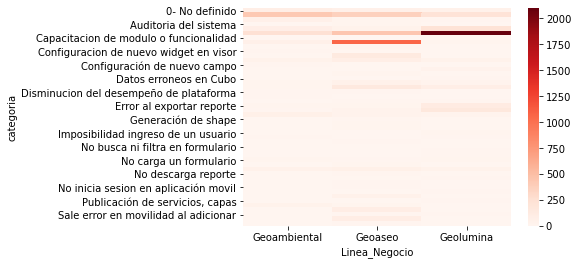

In [ ]:
my_contingency_table = pd.crosstab(index=data_desc["categoria"], 
                                   columns=data_desc["Linea_Negocio"])    # Se crea tabla de contingencia 
sns.heatmap(my_contingency_table, cmap="Reds")                            # Gráficar mapa de calor
chi2_contingency(my_contingency_table)[1]                                 # Prueba Chi cuadrado para tabla de contingencia

### Visualización de valores faltantes

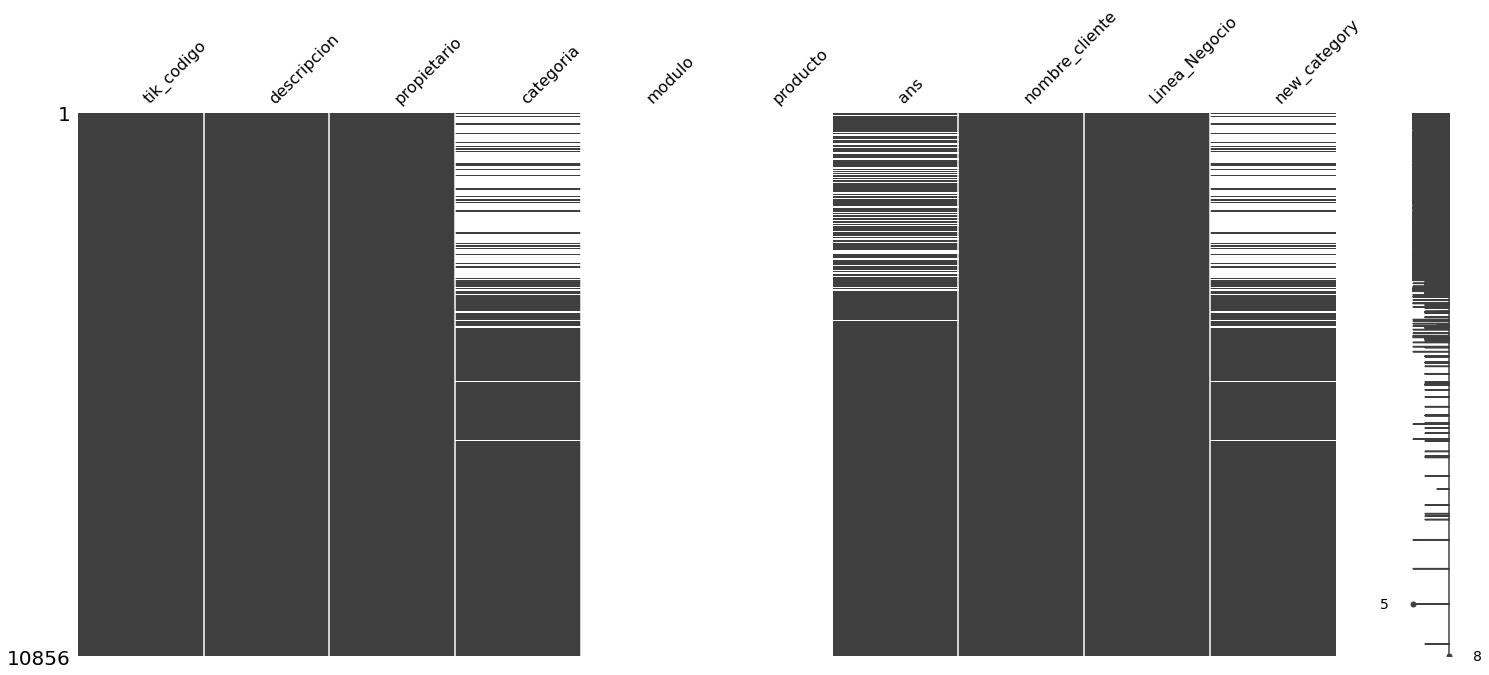

In [ ]:
# La región blanca representa valores faltantes para la característica (variable)

msno.matrix(data_desc)
plt.show()

### Mapa de calor: Categorías vs Líneas de negocio (Normalizada por categoría)

Text(0.5, 1.0, 'Categoria vs.Linea de negocio (normalized by index)')

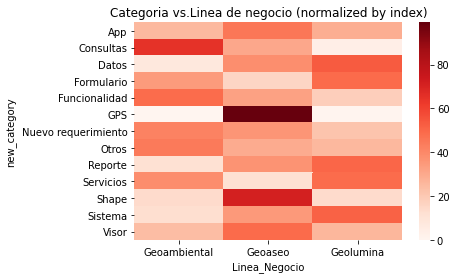

In [ ]:
my_contingency_table_by_index=pd.crosstab(index=data_desc["new_category"], 
                                          columns=data_desc["Linea_Negocio"], normalize="index")*100
ax = sns.heatmap(my_contingency_table_by_index, cmap="Reds")
ax.set_title("Categoria vs.Linea de negocio (normalized by index)")

### Mapa de calor: Categorías vs Líneas de negocio (Normalizada por línea de negocio)

Text(0.5, 1.0, 'Categoria vs.Linea de negocio (normalized by columns)')

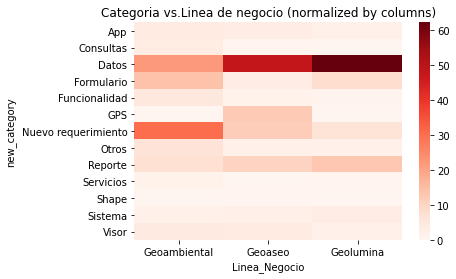

In [ ]:
my_contingency_table_by_columns=pd.crosstab(index=data_desc["new_category"], columns=data_desc["Linea_Negocio"], normalize="columns")*100
ax = sns.heatmap(my_contingency_table_by_columns, cmap="Reds")
ax.set_title("Categoria vs.Linea de negocio (normalized by columns)")

In [ ]:
from nltk.tokenize import word_tokenize     # Librería para tratamiento de "Tokens"
from nltk.tokenize.regexp import regexp_tokenize

In [ ]:
# Definición de stopwords

stop_words = stopwords.words('spanish')
stop_words

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [ ]:
%%time

# Función para procesamiento de texto
import unidecode

def stripchars(data):
    data = data.lower()
    data = data+" "
    data = data.replace("á","a").replace("é","e").replace("í","i").replace("ó","o").replace("ú","u")
    p = re.compile(r'[^\w\s\d]')
    p = p.sub(' ', data)
    p = re.sub(" \d+", " ", p)
    return p


data_desc['new_descripcion'] = data_desc['descripcion'].astype(str).apply(lambda k: stripchars(k))#.apply(lambda k: unidecode.unidecode(k))


Wall time: 187 ms


In [ ]:
txt = "año1999"
#unidecode.unidecode(txt)
stripchars(txt)

'año1999 '

In [ ]:
data_desc.head()

tik_codigo                                        descripcion  \
2     TIK1006  Se debe realizar la configuración de los servi...   
3     TIK1015                Análisis Calidad y verificaciones.    
5     TIK1007                         Crear servicios Geoserver    
8     TIK1008                         Crear servicios Geoserver    
12    TIK1020                     publicación servicio Geoserver   

     propietario                        categoria  modulo  producto ans  \
2   1.607954e+07           1- Nuevo requerimiento     NaN       NaN  NR   
3   1.058818e+09           1- Nuevo requerimiento     NaN       NaN  NR   
5   2.434355e+07  Publicación de servicios, capas     NaN       NaN  SS   
8   2.434355e+07  Publicación de servicios, capas     NaN       NaN  SS   
12  2.434355e+07           1- Nuevo requerimiento     NaN       NaN  NR   

                  nombre_cliente Linea_Negocio         new_category  \
2   Cartagueña de Aseo Total ESP       Geoaseo  Nuevo requerimiento   
3                        Codensa     Geolumina  Nuevo requerimiento   
5                       Llanogas     Geolumina            Servicios   
8                       Llanogas     Geolumina            Servicios   
12                      Llanogas     Geolumina  Nuevo requerimiento   

                                      new_descripcion  
2   se debe realizar la configuracion de los servi...  
3                analisis calidad y verificaciones     
5                         crear servicios geoserver    
8                         crear servicios geoserver    
12                    publicacion servicio geoserver

In [ ]:
from spellchecker import SpellChecker

spell = SpellChecker(language='es')


def spelling_review(words):
    correction = []
    for word in words:
        # Get the one `most likely` answer
        correction.append(spell.correction(word))
    return correction



In [ ]:
def remove_stop_words(review):
    tokens = word_tokenize(review)  
    tweet_with_no_stop_words = [spell.correction(token) for token in tokens if not token in stop_words]
    reformed_review = ' '.join(tweet_with_no_stop_words)
 
    return reformed_review


In [ ]:
%%time

data_desc['new_descripcion'] = data_desc['new_descripcion'].astype(str).apply(lambda k: remove_stop_words(k))
data_desc.head()

Wall time: 2h 53min 47s


tik_codigo                                        descripcion  \
2     TIK1006  Se debe realizar la configuración de los servi...   
3     TIK1015                Análisis Calidad y verificaciones.    
5     TIK1007                         Crear servicios Geoserver    
8     TIK1008                         Crear servicios Geoserver    
12    TIK1020                     publicación servicio Geoserver   

     propietario                        categoria  modulo  producto ans  \
2   1.607954e+07           1- Nuevo requerimiento     NaN       NaN  NR   
3   1.058818e+09           1- Nuevo requerimiento     NaN       NaN  NR   
5   2.434355e+07  Publicación de servicios, capas     NaN       NaN  SS   
8   2.434355e+07  Publicación de servicios, capas     NaN       NaN  SS   
12  2.434355e+07           1- Nuevo requerimiento     NaN       NaN  NR   

                  nombre_cliente Linea_Negocio         new_category  \
2   Cartagueña de Aseo Total ESP       Geoaseo  Nuevo requerimiento   
3                        Codensa     Geolumina  Nuevo requerimiento   
5                       Llanogas     Geolumina            Servicios   
8                       Llanogas     Geolumina            Servicios   
12                      Llanogas     Geolumina  Nuevo requerimiento   

                                      new_descripcion  
2   debe realizar configuración servidores soporta...  
3                     analisis calidad verificaciones  
5                           crear servicios geoserver  
8                           crear servicios geoserver  
12                     publicación servicio geoserver

In [ ]:
%%time
data_desc.to_csv(r'cleaningDF_13agosto.csv',index=False,encoding='latin-1')

Wall time: 153 ms


In [ ]:
tmp=data_desc.sample(n=10)
tmp

tmp['new_descripcion'] = tmp['new_descripcion'].astype(str).apply(lambda k: remove_stop_words(k)).apply(lambda k: unidecode.unidecode(k))
tmp

tik_codigo                                        descripcion  \
7776     TIK4240  Pruebas app de levantamiento, reportan cierre ...   
7664     TIK4150  Solicito amablemente el cambio de estado de la...   
10181    TIK7040  necesitamos hacer una prueba piloto de un nuev...   
8974     TIK6669                         Modulo de Tasa Retributiva   
10239    TIK7217  Cordial saludo, adjunto los cargues de ciclos ...   
11411    TIK8187          solicitud cargue de ciclos Veolia Oriente   
14189   TIK11333  Por favor revisar el campo fecha aprobación pó...   
5773     TIK2280  El widget de generar denuncias actual no esta ...   
6030     TIK2529  Crear formulario de consultas para las chicas ...   
4256     TIK2217  Se ha intentado descargar el reporte de elemen...   

        propietario                      categoria  modulo  producto  ans  \
7776   1.058818e+09         1- Nuevo requerimiento     NaN       NaN   NR   
7664   1.053860e+09           Cambiar datos por BD     NaN       NaN   SS   
10181  1.053771e+09         1- Nuevo requerimiento     NaN       NaN   NR   
8974   1.104704e+09         1- Nuevo requerimiento     NaN       NaN   NR   
10239  1.053785e+09          Carga de datos masiva     NaN       NaN   CD   
11411  1.053793e+09          Carga de datos masiva     NaN       NaN   CD   
14189  3.040517e+07  Calculo erroneo en formulario     NaN       NaN  NCB   
5773   1.053860e+09  Calculo erroneo en formulario     NaN       NaN  NCB   
6030   1.053860e+09         1- Nuevo requerimiento     NaN       NaN   NR   
4256   1.053860e+09      Datos erroneos en reporte     NaN       NaN  NCC   

                                      nombre_cliente Linea_Negocio  \
7776                                         Codensa     Geolumina   
7664                                         Codensa     Geolumina   
10181                    Veolia (antiguo Grupo Sala)       Geoaseo   
8974                     CAR de Caldas - Corpocaldas  Geoambiental   
10239                    Veolia (antiguo Grupo Sala)       Geoaseo   
11411                    Veolia (antiguo Grupo Sala)       Geoaseo   
14189                    CAR de Caldas - Corpocaldas  Geoambiental   
5773                  Dosquebradas Energía y Luz S.A     Geolumina   
6030   INVAMA Instituto de Valorización de Manizales     Geolumina   
4256                                         Codensa     Geolumina   

              new_category                                    new_descripcion  
7776   Nuevo requerimiento  pruebas app levantamiento reportan cierre apli...  
7664                 Datos  solicito amablemente cambio orden ot_1082140 q...  
10181  Nuevo requerimiento  necesitamos hacer prueba piloto nuevo disposit...  
8974   Nuevo requerimiento                             modulo tasa retribuida  
10239                Datos        cordial saludo adjunto cargues ciclos pasto  
11411                Datos              solicitud cargue ciclos verla oriente  
14189           Formulario  favor revisar campo fecha aprobacion polizas p...  
5773            Formulario  midget generar denuncias actual operando gener...  
6030   Nuevo requerimiento  crear formulario consultas chicas call center ...  
4256               Reporte  intentado descargar reporte elementos levantad...

In [ ]:
# Descripción de Tokens

data_desc['token_desc'] = data_desc['descripcion'].apply(lambda x:regexp_tokenize(x,pattern='\s+',gaps=True))

### Visualización de ocurrencia de términos por categoría

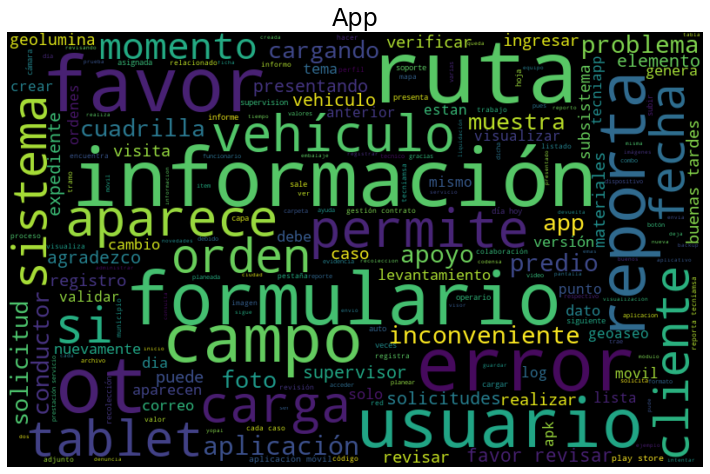

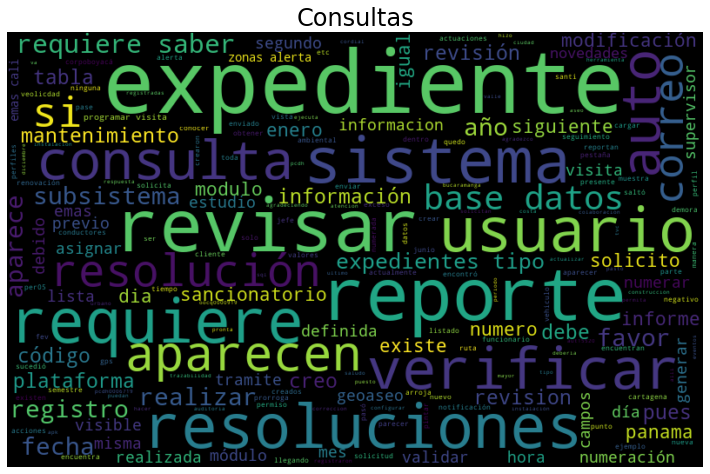

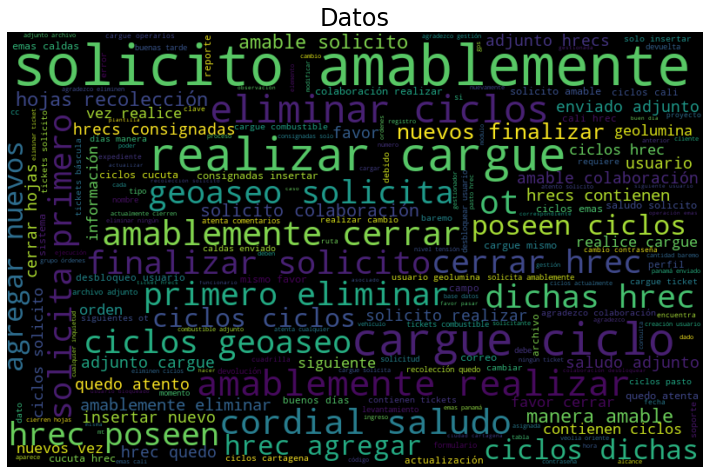

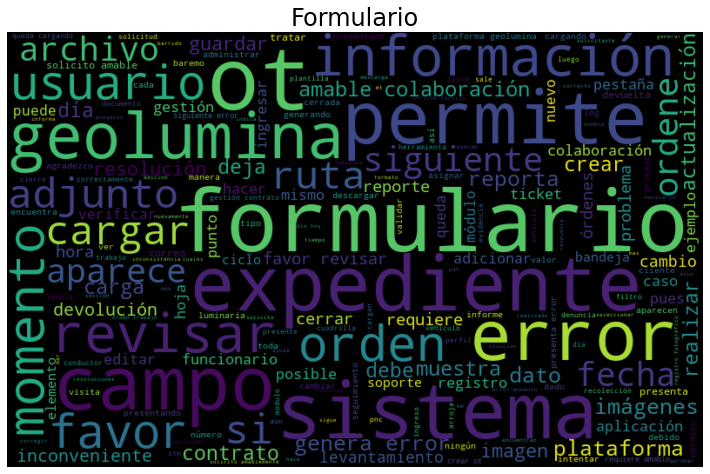

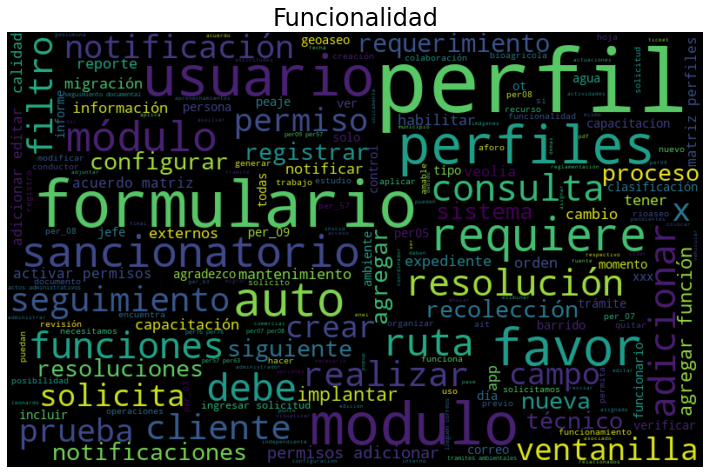

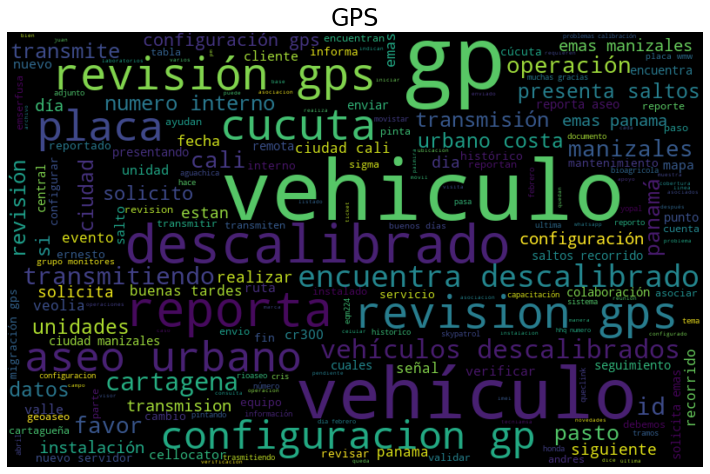

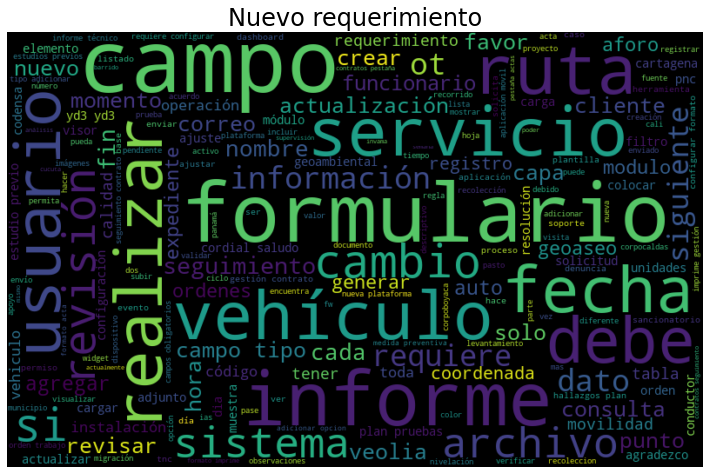

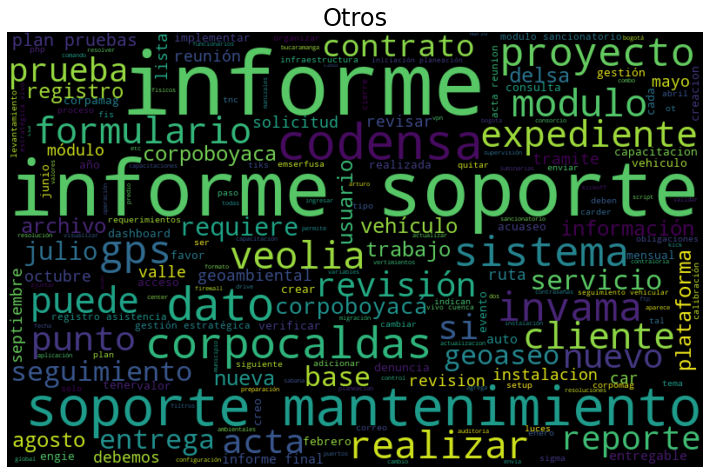

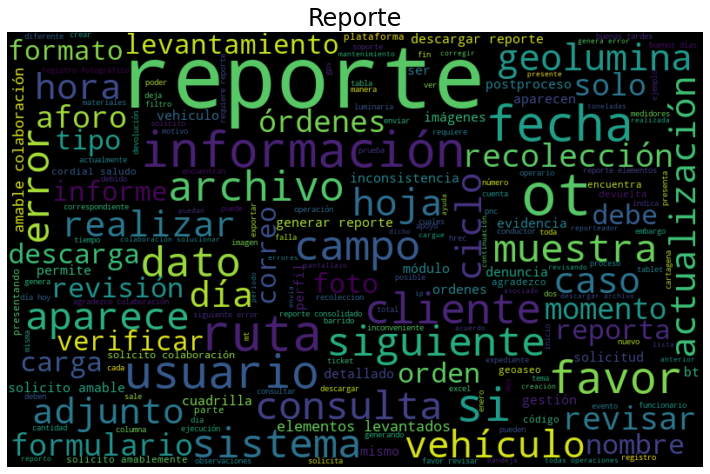

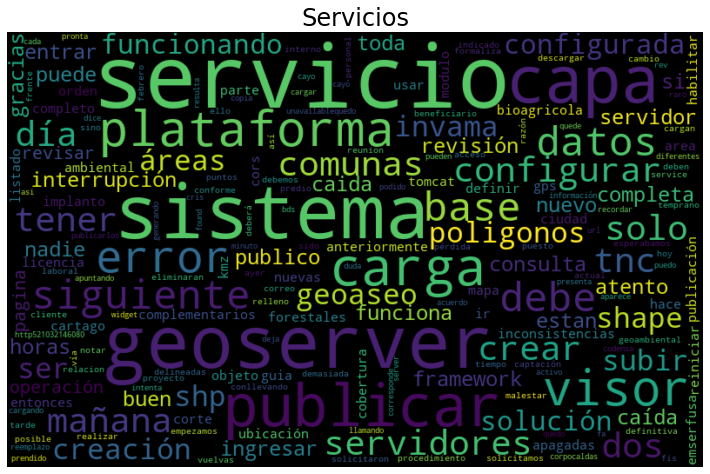

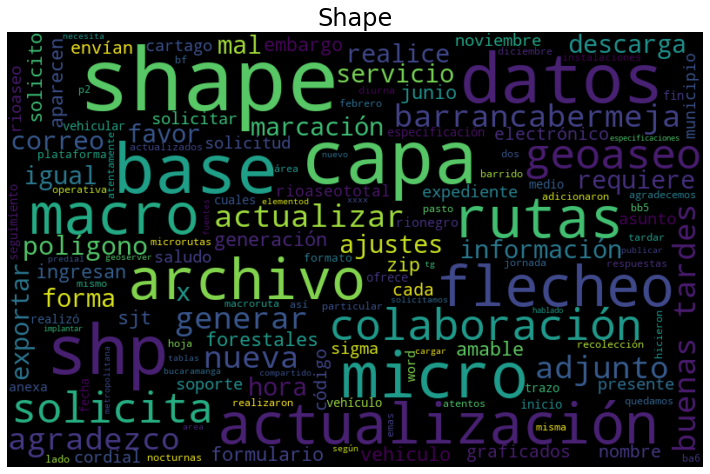

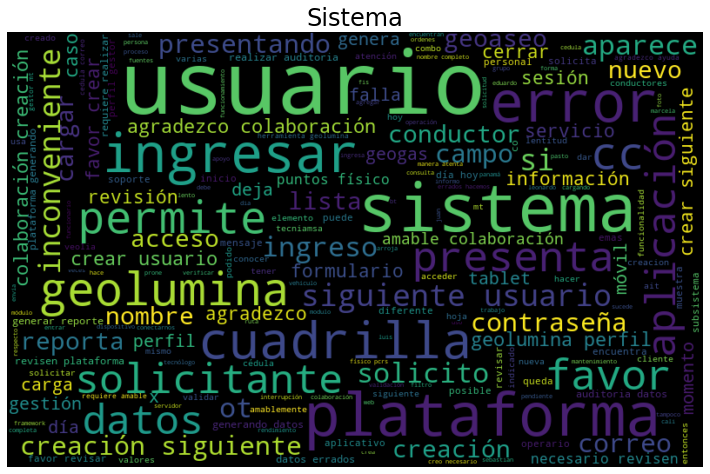

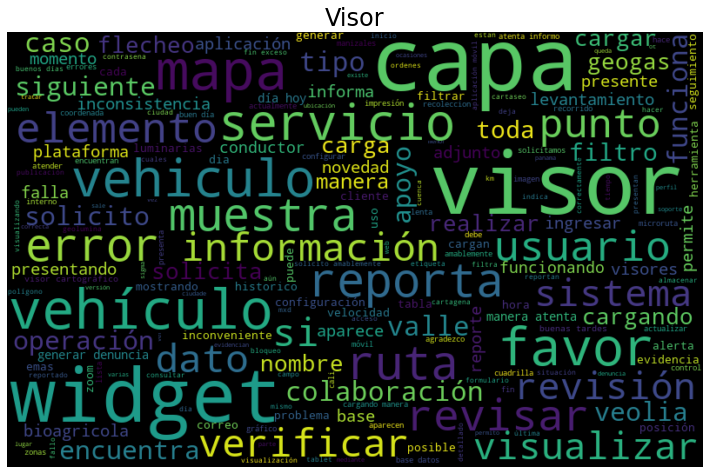

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [ ]:
from wordcloud import WordCloud
df = {}

for category in category_list:
    df1 = data_desc[data_desc.new_category == category]
    #print(df1)
    text = " ".join([x for x in df1['descripcion']])
    #text = "mi mamá mima mucho a mi hermana"
    wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(text)
    df1 = pd.Series(df1.token_desc.sum())
    
    df[category]=df1.value_counts()
    
  
    # plot the graph
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(category, fontsize=24)
    plt.show()
    
